# Ford GoBike System Data Exploration
> **BY ABDULRAHEEM BASHIR**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pre_wra">Preliminary Wrangling</a></li>
<li><a href="#data_clean">Cleaning Data</a></li>
<li><a href="#uni_exp">Univariate Exploration</a></li>
<li><a href="#biv_exp">Bivariate Exploration</a></li>
<li><a href="#mul_exp">Multivariate Exploration</a></li>
<li><a href="#con">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# Reading the Ford GoBike System Data
# saving it as a dataframe with the name bike_df

bike_df = pd.read_csv('bike.csv')

In [3]:
# displaying few top rows from the dog_rate dataframe

bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<a id='pre_wra'></a>
## Preliminary Wrangling

In [4]:
# displaying some information about dataframe

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> The dataset contains 183,412 ebtries including information about when and where the trip began and finished, the duration of each trip in seconds, and some user information.

>The dataset has 16 columns though there are some misrepresentation in the Data type for start_time and end_timecolumns.

### What is/are the main feature(s) of interest in your dataset?

> My main feature(s) of interest in this dataset dataset are: duration_sec, start_station_name, end_station_name, and bike_share for all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help in this investigation are user_type, gender, member_birt_year, start_time and end_time

<a id='data_clean'></a>
## Cleaning Data
> In this section, The data will be cleaned up so that it is suitable for analysis.

In [5]:
# Checking for duplicates in the dataframe

bike_df.duplicated().sum()

0

The output above demonstrates that there are no duplicates in the dataframe.

In [6]:
# Checking the dataframe's columns for the sum of missing data.

bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# Checking for the total amount of missing data

bike_df.isnull().sum().sum()

17318

In [8]:
# Calculating the percentage of missing data

(bike_df.isnull().sum().sum() / bike_df.shape[0]) * 100

9.44213028591368

The output above reveals that the total quantity of missing data in the dataframe is 17,318 (which accounts for 9.4% of the data), making it appropriate to drop the missing data.

In [9]:
# dropping the missing data

bike_df.dropna(inplace=True)

In [10]:
# Checking for the total amount of missing data
# to determine whether the required change has been made

bike_df.isnull().sum().sum()

0

In [11]:
# Changing the data type of the start time and end time fields to datatime

bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

In [12]:
# displaying information about dataframe
# to determine whether the required change has been made

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [13]:
# Checking for the unique years
# in the start_time column

bike_df['start_time'].dt.year.unique()

array([2019], dtype=int64)

In [14]:
# Checking for the unique years
# in the end_time column

bike_df['end_time'].dt.year.unique()

array([2019], dtype=int64)

The above output indicates that the activities in this dataset take place in 2019. This information, along with the member's birth year, can assist us in determining the member's age. This will necessitate the creation of a new column called age.

In [15]:
#Using the aforementioned data, add a new column with the name age
# and change the type of the data to integer.

bike_df['age'] = (2019 - bike_df['member_birth_year']).astype(int)

In [16]:
# dropping columns that are unnecessary for this analysis
bike_df.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id','member_birth_year'],axis=1,inplace=True)

In [17]:
# displaying the column names
# to determine whether the required change has been made

bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'age'],
      dtype='object')

In [18]:
# Checking for the unique gender type

bike_df['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [19]:
# displaying some descriptive statistic abput the data

bike_df.describe()

,duration_sec,age
count,174952.000000,174952.000000
mean,704.002744,34.196865
std,1642.204905,10.118731
min,61.000000,18.000000
25%,323.000000,27.000000
50%,510.000000,32.000000
75%,789.000000,39.000000
max,84548.000000,141.000000


The statistics above shows that there are some outliers in the age column, which will be the first thing to look at in the next section and how to deal with them.

<a id='uni_exp'></a>
## Univariate Exploration

> In this section, i will be investigating distributions of individual variables.

> I'd like to conduct additional research on the age column in the following columns

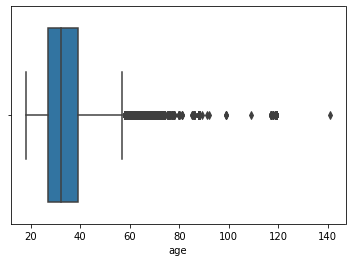

In [20]:
# Visually investigating the member's age

sns.boxplot(x=bike_df.age);

In [21]:
# Cheking for the members that are older than 55 years old.

(bike_df.age > 55).value_counts()

False    167065
True       7887
Name: age, dtype: int64

The scatterplot shown above demonstrates that the age of the members has some outlier values. With this, I will remove any data that is older than 55 years old.

> For the top 10 stations with the most start and end tris, I'd like to explore the start station and end station in the following cells

In [22]:
# Filtering out data with an age less than
# or equal to 55 years old

bike_df = bike_df.query('age <= 55')

The cell above is used to find data that is less than or equal to 55 years old and then add it to the dataframe. I'll only be working with data that is no older than 55 years from now on.

In [23]:
# Cheking for the data that is older than 55 years old.
# to determine whether the required change has been made

(bike_df.age > 55).sum()

0

In [24]:
# Query the 10 most popular start station as a table
# and assign it to start_station_count variable
# Get the index in order
# and assign it to start_station_order variable
# Subset the dataframe that has the 10 most popular start station
# and assign it to start_subset_df variable

start_station_count = bike_df['start_station_name'].value_counts().reset_index(name='station_trips_count')[:10]
start_station_order = start_station_count['index']
start_subset_df = bike_df.loc[bike_df['start_station_name'].isin(start_station_count["index"])]

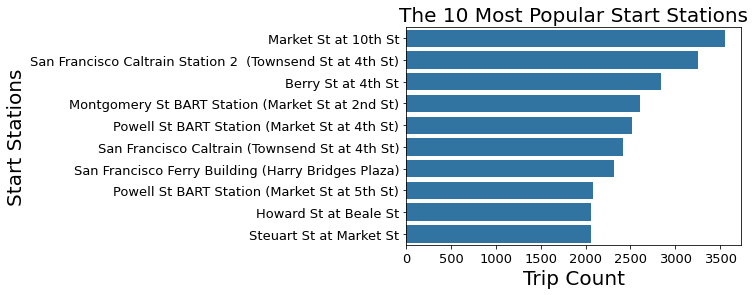

In [25]:
# Obtain the first color from a seaborn color palette.
# and assign it to color variable
# plot the count of start station using bar chart
# because of the long station names

color = sns.color_palette()[0]
sns.countplot(data = start_subset_df, y = 'start_station_name', color = color, order = start_station_order)

# Format the plot's visual
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('Start Stations',size=20)
plt.xlabel('Trip Count',size=20)
plt.title('The 10 Most Popular Start Stations',size=20);

In [26]:
# Query the 10 most popular end station as a table
# and assign it to end_station_count variable
# Get the index in order
# and assign it to end_station_order variable
# Subset the dataframe that has the 10 most popular end station
# and assign it to end_subset_df variable

end_station_count = bike_df['end_station_name'].value_counts().reset_index(name='station_trips_count')[:10]
end_station_order = end_station_count['index']
end_subset_df = bike_df.loc[bike_df['end_station_name'].isin(end_station_count["index"])]

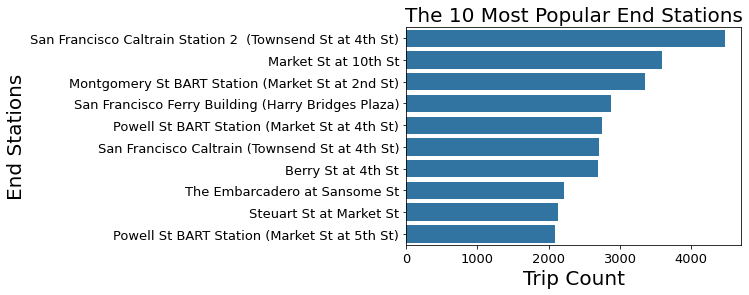

In [27]:
# plot the count of start station using bar chart
# because of the long station names
sns.countplot(data = end_subset_df, y = 'end_station_name', color = color, order = end_station_order)

# Format the plot's visual
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('End Stations',size=20)
plt.xlabel('Trip Count',size=20)
plt.title('The 10 Most Popular End Stations',size=20);

- The top 10 most popular start stations are shown in the first chart above, with 'Market ST at 10th St' having the most start trips and 'Stewart St at Market St' having the fewest.
- The top 10 most popular end stations are shown in the second chart above, with 'San Francisco Caltrain Station 2 (Townsend St at 4th St' having the most end trips and 'Powell St BART Station (Market St at 5th St)' having the fewest.
- It's also worth noting that 'Market St at 10th St', 'San Francisco Caltrain Station 2 (Townsend St at 4th St)', 'Montgomery St BART Station (Market St at 2nd St)', and 'Powell St BART Station (Market St at 4th St)' all rank in the top 5 for both start and finish stations.

> I'll be examining the distribution of trip duration (in seconds) in the cells below.

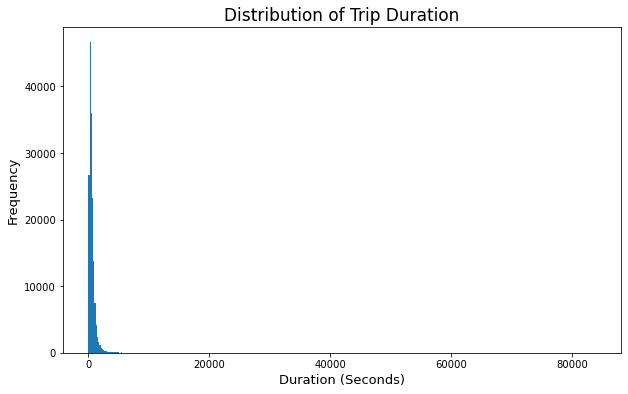

In [28]:
# ploting the distribution of trip duration

plt.figure(figsize = [10, 6])
bins = np.arange(60, 84000, 200) # the values here are informed by the descriptive statistics
plt.hist(data = bike_df, x = 'duration_sec' , bins = bins)
plt.xlabel('Duration (Seconds)', size = 13)
plt.ylabel('Frequency', size = 13)
plt.title('Distribution of Trip Duration', size = 17);

As can be seen from the output above, the curve has a very long right tail. As a result, I want to examine the sata in more detail by putting a logarithmic scale on the y-axis and setting a limit to the x-axis to focus on the most frequent period.

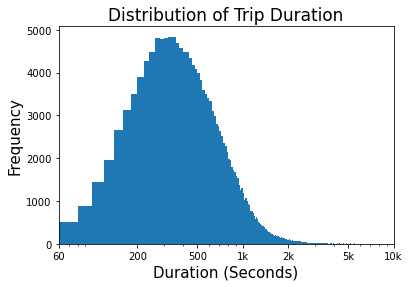

In [29]:
# The Duration with a logarithmic scale and x-axis limit

bins = np.arange(60, 10000, 20)
plt.hist(data = bike_df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlim(60, 10000)
x_tick_value = [60, 200, 500, 1000, 2000, 5000, 10000]
x_tick_labels = ['60', '200', '500', '1k', '2k', '5k', '10k']
plt.xticks(x_tick_value, x_tick_labels)
plt.xlabel('Duration (Seconds)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Distribution of Trip Duration', size = 17);

- It can be seen that the distribution is a unimodal curve.
- Most journeys take less than 1000 seconds, and only a small number take longer than 2000 seconds.
- The distribution also has an extremely long right tail.

> The distribution of user types will be examined in the next cell

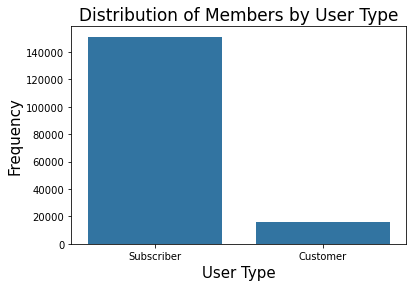

In [30]:
# plot the user type count
order = bike_df['user_type'].value_counts().index
sns.countplot(data = bike_df, x = 'user_type', color = color, order = order)

# Format the plot's visual
plt.xlabel('User Type', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Distribution of Members by User Type', size = 17);

The output above shows that the majority of members are subscribers, accounting for up to 90% of all users.

> The cell below will investigate the gender distribution of the members.

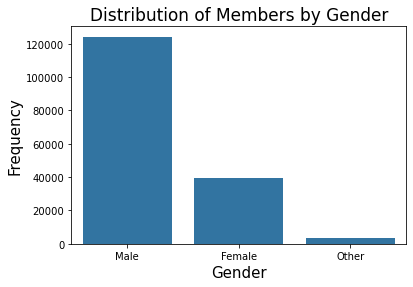

In [31]:
# plot the user type count
order = bike_df['member_gender'].value_counts().index
sns.countplot(data = bike_df, x= 'member_gender', color = color, order = order)

# Format the plot's visual
plt.xlabel('Gender', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Distribution of Members by Gender', size = 17);

According to the output above, the bulk of members are males, accounting for up to 74% of all users, while female members account for approximately 24% of all users.

> The cell below will examine how bikes are shared for all trips.

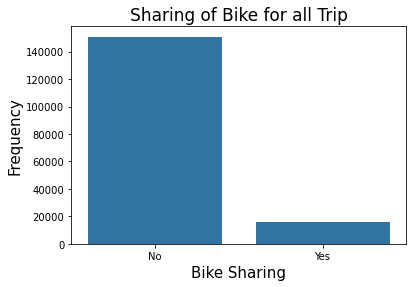

In [32]:
# plot the user type count
order = bike_df['bike_share_for_all_trip'].value_counts().index
sns.countplot(data = bike_df, x = 'bike_share_for_all_trip', color = color, order = order)

# Format the plot's visual
plt.xlabel('Bike Sharing', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Sharing of Bike for all Trip', size = 17);

It is clear from the output above that 90% of the members didn't share the bike for all trip.

> The cell below will examine the distribution of members by age

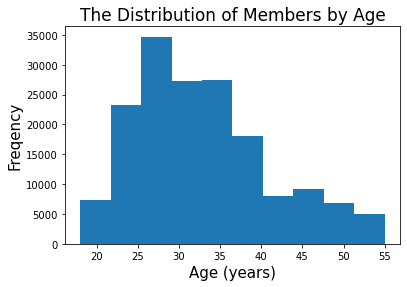

In [33]:
# plot the dustribution of members by age
plt.hist(data = bike_df, x = 'age')

# Format the plot's visual
plt.xlabel('Age (years)', size = 15)
plt.ylabel('Freqency', size = 15)
plt.title('The Distribution of Members by Age', size = 17);

We can see from the histogram above that most members are between the ages of 20 and 40.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Duration's curve is right-skewed, so I performed a logarithmic scale modification and added an x-axis limit to concentrate on the intervals that occur the most frequently. The curve included what looked like a unimodal peak at about 300 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the investigation, I have learned that the majority of users are 20-40 years old, male, belong to the subscriber category, and did not share the bike for the entire journey.

> I also changed the data type of some columns and added an age column to view the distribution of members by age.

<a id='biv_exp'></a>
## Bivariate Exploration

> In this section, i will be investigating relationships between pairs of variables in your data.

> I'd like to investigate the association between a member's age and how bikes are shared for all trips.

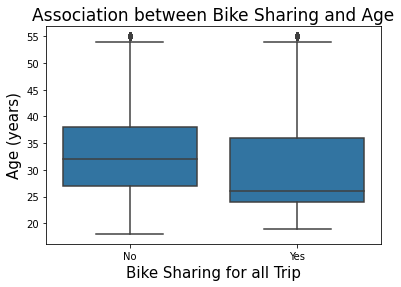

In [34]:
# ploting the association
sns.boxplot(data = bike_df, x = 'bike_share_for_all_trip', y = 'age', color = color)

# Format the plot's visual
plt.xlabel('Bike Sharing for all Trip', size = 15)
plt.ylabel('Age (years)', size = 15);
plt.title('Association between Bike Sharing and Age', size = 17);

The results above demonstrate that youthful members are more willing to share the bike.

> I'd like to investigate the association between a member's age and how long the trip lasts.

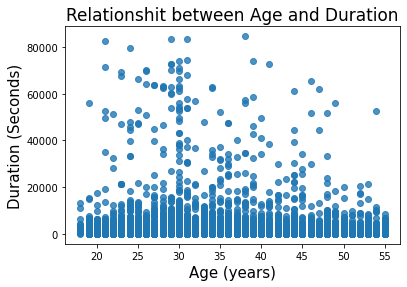

In [35]:
# ploting the association
sns.regplot(data = bike_df, x = 'age', y = 'duration_sec', fit_reg = False)

# Format the plot's visual
plt.xlabel('Age (years)', size = 15)
plt.ylabel('Duration (Seconds)', size = 15)
plt.title('Relationshit between Age and Duration', size = 17);

The scatter plot above demonstrates a weak negative association between duration and age. The trip lasts less time as the user becomes older.

> I'd like to investigate members categoriy relate to bike sharing.

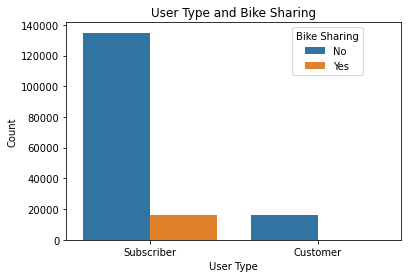

In [36]:
# ploting the association
order = bike_df['user_type'].value_counts().index
sns.countplot(data = bike_df, x = 'user_type', hue = 'bike_share_for_all_trip', order = order)

# Format the plot's visual
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title = 'Bike Sharing', bbox_to_anchor=(0.9, 1))
plt.title('User Type and Bike Sharing');

The results above demonstrate that only subscribers shared bikes, and no customers ever shared a bike for the entirety of a trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Youthful members are more willing to share the bike.

> There is a weak negative association between duration and age. The trip lasts less time as the member becomes older.

> Only subscribers shared bikes, and no customers ever shared a bike for the entirety of the trip.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The majority of bike-sharing riders are in their twenties.

> Bike sharing is limited to subscribers, which makes sense.

<a id='mul_exp'></a>
## Multivariate Exploration

> In this section, I will be creating plots of three or more variables to investigate the data even
further.

> I'd like to investigate the association between Age, Gender and Bike Sharing.

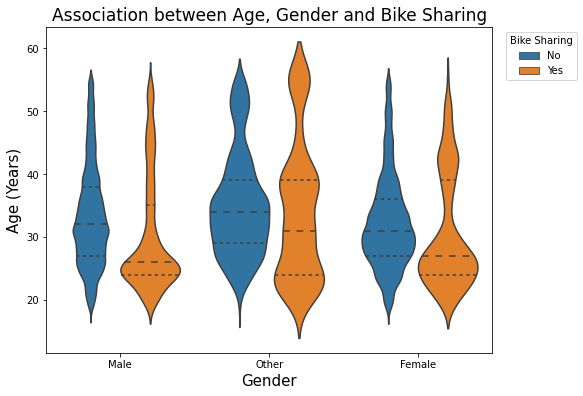

In [37]:
# Setting the width and height of the plot
# ploting the association

plt.figure(figsize = [8, 6])
sns.violinplot(data = bike_df, x = 'member_gender', y = 'age', hue = 'bike_share_for_all_trip', inner = 'quartile')

# Format the plot's visual
plt.xlabel('Gender',  size = 15)
plt.ylabel('Age (Years)', size = 15)
plt.title('Association between Age, Gender and Bike Sharing', size = 17)
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.2, 1));

Bike sharing is connected with younger age across all genders, i.e. most of the members who share the bike for the entire journey are younger.

> I'd like to investigate the association between Gender, Duration of Trip and Bike Sharing.

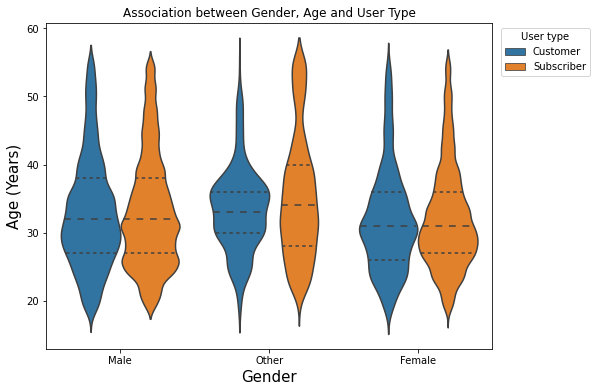

In [43]:
# Setting the width and height of the plot
# ploting the association
plt.figure(figsize = [8, 6])
sns.violinplot(data = bike_df, x = 'member_gender', y = 'age', hue = 'user_type', inner = 'quartile')

# Format the plot's visual
plt.xlabel('Gender',  size = 15)
plt.ylabel('Age (Years)', size = 15)
plt.title('Association between Gender, Age and User Type')
plt.legend(title='User type', bbox_to_anchor=(1.23, 1));

User type isn't related to neither the Age nor the Gender of the user.

> I'd like to investigate the association between Gender, Duration of Trip and Bike Sharing.

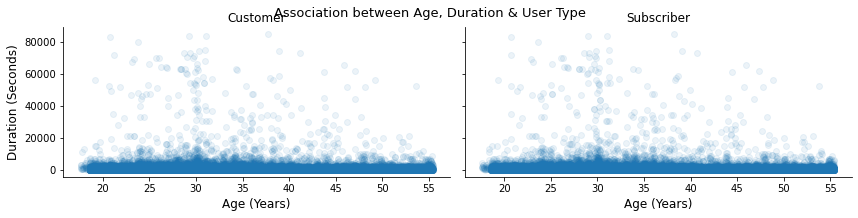

In [39]:
# Setting the width and height of the plot
# ploting the association
g = sns.FacetGrid(data = bike_df, col = 'user_type', height = 3, aspect = 2)
g.map(sns.regplot, data = bike_df, x = 'age', y = 'duration_sec', fit_reg = False, x_jitter = 0.4, scatter_kws = {'alpha':1/12})

# Format the plot's visual
g.set_titles('{col_name}', size = 12)
g.set_axis_labels('Age (Years)','Duration (Seconds)', size = 12)
plt.suptitle('Association between Age, Duration & User Type', size = 13);

The output above shows that the User Type has no effect on the link between Age and Duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Bike sharing is connected with younger age across all genders, i.e. most of the members who share the bike for the entire journey are younger.

### Were there any interesting or surprising interactions between features?

> It is unexpected that it is difficult to identify three characteristics that have a significant positive link.

<a id='con'></a>
## Conclusions

The following are the important findings of the above analysis as a result of the above data investigation and exploration:

1. Bike sharing is limited to only subscribers, which makes sense.
2. Majority of members are 20-40 years old, male, belong to the subscriber category, and did not share the bike for the entire journey.
3. Most journeys take less than 1000 seconds, and only a small number take longer than 2000 seconds.
4. Youthful members are more willing to share the bike.